<font size="5">Data Model</font>

In [1]:
#install pyramid
!pip install pmdarima --user

In [2]:
!pip install plotly==4.8.2


In [3]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [4]:

#Import Library

import pandas as pd #Provides functions to merge multiple CSV files in quick time.
import numpy as np
import os #Provides functions like copy, delete, read, write files, and directories.
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AR
from statsmodels.tsa.statespace.sarimax import SARIMAXResults

from sklearn.metrics import mean_squared_error, mean_absolute_error
import itertools
import scipy
import warnings

from pylab import rcParams
rcParams['figure.figsize'] = 15, 6


from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import ADFTest

warnings.filterwarnings("ignore") # ignoring annoying warnings

%matplotlib inline

In [5]:
train_final = pd.read_csv (r'D:\Jupyter\Merged\train_final.csv')  

train_final.Date = pd.to_datetime(train_final.Date,format='%Y-%m-%d')
train_final.index = train_final.Date
train_final = train_final.drop('Date', axis=1)
train_final.head()

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,A,B,C
Date,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,2,50605.27,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,3,13740.12,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,4,39954.04,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0
2010-02-05,1,5,32229.38,0,151315,42.31,2.572,211.096358,8.106,2010,2,5,5,1,0,0


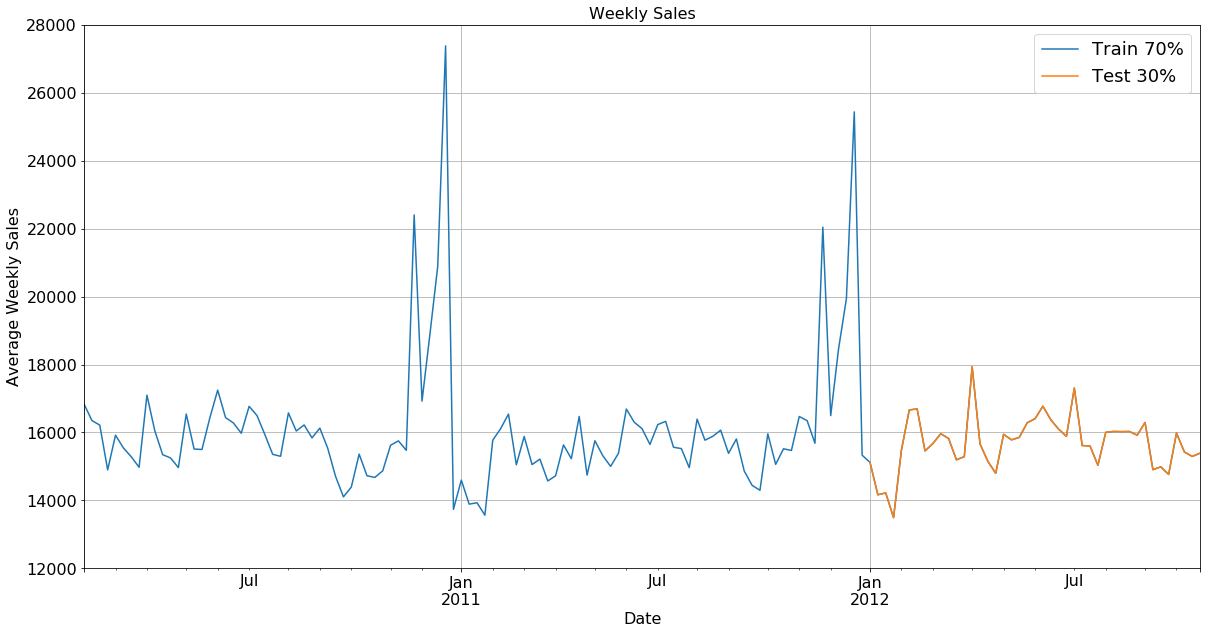

In [6]:
train_final1 = train_final.groupby(train_final.index).mean()
train_finalS=train_final1['Weekly_Sales']
train_data = train_final1[:int(0.7*(len(train_final1)))]
test_data = train_final1[int(0.7*(len(train_final1))):]

train_data = train_data['Weekly_Sales']
test_data = test_data[['Weekly_Sales','IsHoliday']]

train_final1.Weekly_Sales.plot(figsize=(20,10), title= 'Weekly_Sales', fontsize=16)
test_data.Weekly_Sales.plot(figsize=(20,10), title= 'Weekly_Sales', fontsize=16)

plt.legend(['Train 70%','Test 30%'],loc='best',fontsize=18)
plt.title('Weekly Sales',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Average Weekly Sales',fontsize=16)
plt.ylim(12000,28000)
plt.grid(True)

plt.show()

Decomposition

In [7]:
train_final1

,Store,Dept,Weekly_Sales,IsHoliday,Size,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,Week,A,B,C
Date,,,,,,,,,,,,,,,,
2010-02-05,22.038579,44.181726,16836.121997,0.0,137430.535364,33.277942,2.717869,167.398405,8.576731,2010.0,2.0,5.0,5.0,0.511675,0.388832,0.099492
2010-02-12,22.016915,44.377199,16352.056032,1.0,137622.780785,33.361810,2.696102,167.384138,8.567309,2010.0,2.0,12.0,6.0,0.511502,0.391069,0.097429
2010-02-19,22.038965,44.305341,16216.658979,0.0,137278.637219,37.038310,2.673666,167.338966,8.576351,2010.0,2.0,19.0,7.0,0.510245,0.391669,0.098085
2010-02-26,22.041681,44.107421,14899.549688,0.0,137346.344629,38.629563,2.685642,167.691019,8.561375,2010.0,2.0,26.0,8.0,0.510335,0.391393,0.098272
2010-03-05,22.043818,44.045516,15921.015727,0.0,137576.841033,42.373998,2.731816,167.727351,8.572689,2010.0,3.0,5.0,9.0,0.512908,0.388247,0.098845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-28,22.237002,44.154288,14765.327279,0.0,136009.082039,68.151759,3.858245,175.919639,7.225855,2012.0,9.0,28.0,39.0,0.508103,0.387576,0.104321
2012-10-05,22.276882,44.512097,15983.413747,0.0,136334.755712,65.456811,3.848435,175.998254,6.942141,2012.0,10.0,5.0,40.0,0.511761,0.385081,0.103159
2012-10-12,22.225084,44.605686,15427.596739,0.0,136228.789298,57.687284,3.897425,176.123786,6.952682,2012.0,10.0,12.0,41.0,0.509365,0.387291,0.103344


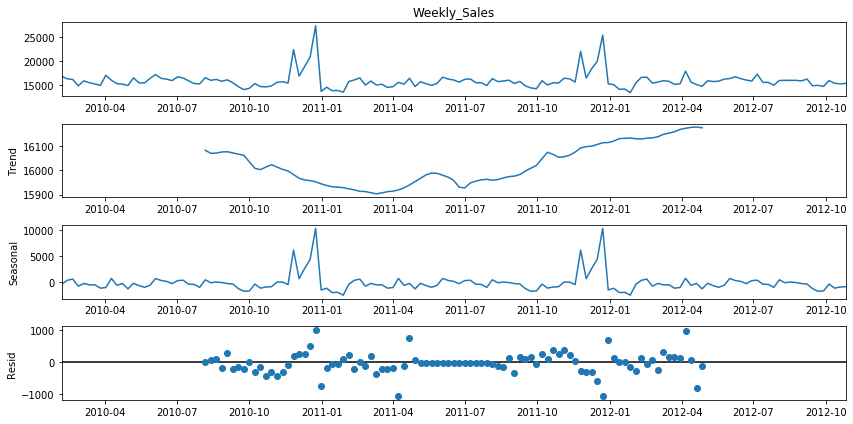

In [8]:
decomposition=seasonal_decompose(train_final1.Weekly_Sales, model= "addictive",freq=52)
rcParams['figure.figsize'] = (12, 6)
fig=decomposition.plot()


This is a useful abstraction.

Decomposition is primarily used for time series analysis, and as an analysis tool it can be used to inform forecasting models on your problem.

It provides a structured way of thinking about a time series forecasting problem, both generally in terms of modeling complexity and specifically in terms of how to best capture each of these components in a given model.

Each of these components are something you may need to think about and address during data preparation, model selection, and model tuning. You may address it explicitly in terms of modeling the trend and subtracting it from your data, or implicitly by providing enough history for an algorithm to model a trend if it may exist.

You may or may not be able to cleanly or perfectly break down your specific time series as an additive or multiplicative model.

Real-world problems are messy and noisy. There may be additive and multiplicative components. There may be an increasing trend followed by a decreasing trend. There may be non-repeating cycles mixed in with the repeating seasonality components.

Nevertheless, these abstract models provide a simple framework that you can use to analyze your data and explore ways to think about and forecast your problem.

Level: is the average value in the series.
Trend: is the increasing or decreasing value in the series.
Seasonality: is the repeating the short-term cycle in the series.
Noise: is the random variation in the series.

In [9]:
#Augmented Dickey-Fuller Test
X = train_final1['Weekly_Sales']
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %.9f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
    
if result[0]<result[4]["5%"]:
    print("Reject H0,- Time Series is Stationary")
else:
    print("Failed to Reject H0- Time Series is Non-Stationary")
    

ADF Statistic: -5.930803
p-value: 0.000000238
Critical Values:
	1%: -3.479
	5%: -2.883
	10%: -2.578
Reject H0,- Time Series is Stationary


- Since less than 0.5, the data is stationary
- Good to use ARIMA

1786083.7872745735

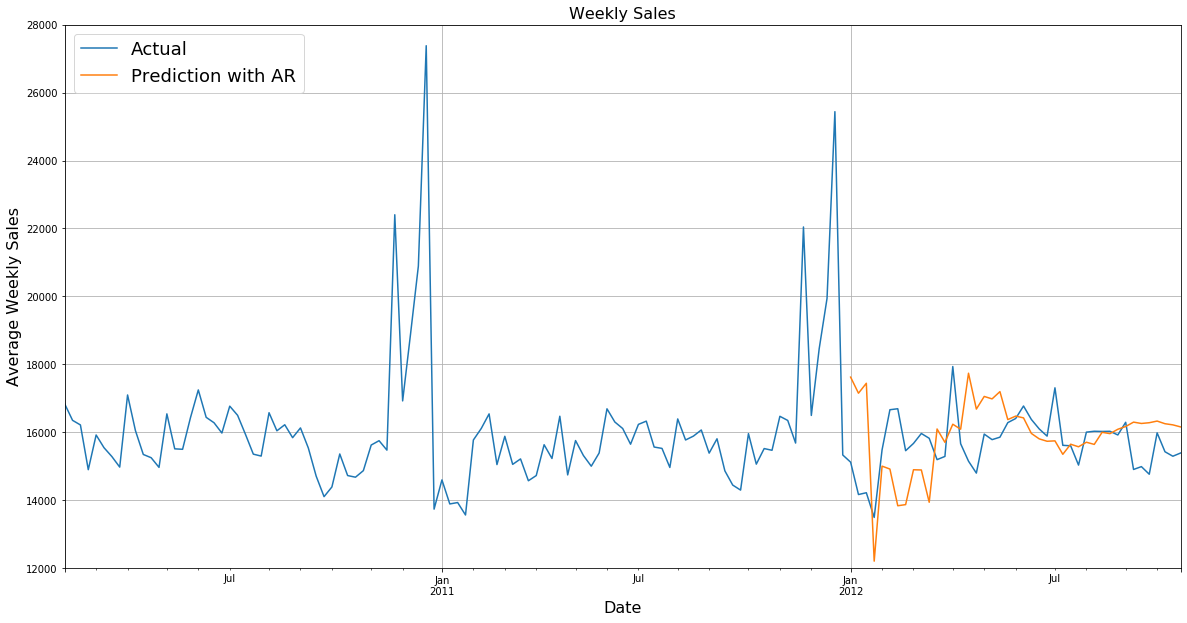

In [10]:
#AR
model_ar=AR(train_data)
model_ar_fit=model_ar.fit()
predictions_AR = model_ar_fit.predict(start=100,end=142)


train_final1.Weekly_Sales.plot(figsize=(20,10))
predictions_AR.plot()

plt.legend(['Actual','Prediction with AR'],loc=2,fontsize=18)
plt.grid(True)


plt.title('Weekly Sales',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Average Weekly Sales',fontsize=16)
plt.ylim(12000,28000)

mean_squared_error(test_data['Weekly_Sales'],predictions_AR)

In [11]:
#ARIMA

from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

model_ARIMA = pm.auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=10, max_q=10, # maximum p and q
                      m=52,             # frequency of series
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      start_Q=0,
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=False,stationary=True)

print(model_ARIMA.summary())

Fit ARIMA(0,0,0)x(0,0,0,0) [intercept=True]; AIC=1812.876, BIC=1818.086, Time=0.011 seconds
Fit ARIMA(0,0,1)x(0,0,0,0) [intercept=True]; AIC=1807.819, BIC=1815.634, Time=0.109 seconds
Fit ARIMA(0,0,2)x(0,0,0,0) [intercept=True]; AIC=1806.090, BIC=1816.511, Time=0.031 seconds
Fit ARIMA(0,0,3)x(0,0,0,0) [intercept=True]; AIC=1806.426, BIC=1819.451, Time=0.087 seconds
Fit ARIMA(0,0,4)x(0,0,0,0) [intercept=True]; AIC=1784.615, BIC=1800.246, Time=0.093 seconds
Fit ARIMA(0,0,5)x(0,0,0,0) [intercept=True]; AIC=1785.690, BIC=1803.926, Time=0.170 seconds
Fit ARIMA(1,0,0)x(0,0,0,0) [intercept=True]; AIC=1804.666, BIC=1812.482, Time=0.032 seconds
Fit ARIMA(1,0,1)x(0,0,0,0) [intercept=True]; AIC=1805.371, BIC=1815.792, Time=0.078 seconds
Fit ARIMA(1,0,2)x(0,0,0,0) [intercept=True]; AIC=1807.867, BIC=1820.893, Time=0.055 seconds
Fit ARIMA(1,0,3)x(0,0,0,0) [intercept=True]; AIC=1809.028, BIC=1824.659, Time=0.079 seconds
Fit ARIMA(1,0,4)x(0,0,0,0) [intercept=True]; AIC=1786.168, BIC=1804.404, Time=0.

<Figure size 720x720 with 0 Axes>

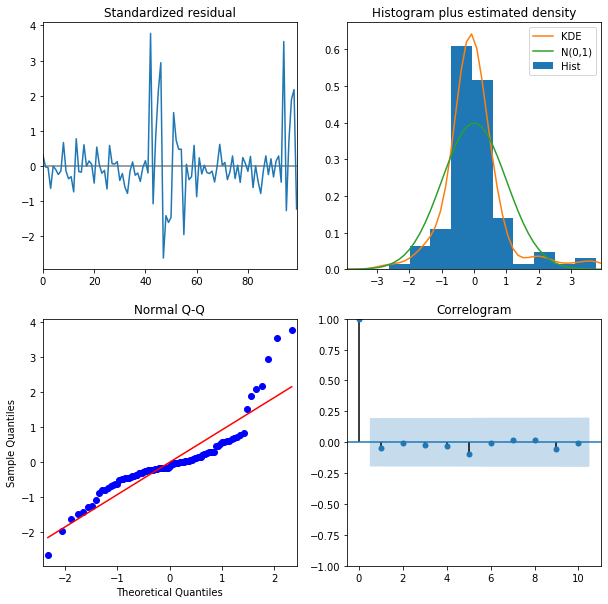

In [12]:
fig=plt.figure(figsize=(10,10))
fig=model_ARIMA.plot_diagnostics(figsize=(10,10))



Top left: The residual errors seem to fluctuate around a mean of zero and have a uniform variance.
Top Right: The density plot suggest normal distribution with mean zero.
Bottom left: All the dots should fall perfectly in line with the red line.  #Any significant deviations would imply the distribution is skewed.
Bottom Right: The Correlogram, aka, ACF plot shows the residual errors are not autocorrelated. Any autocorrelation would imply that there is some pattern in the residual errors which are not explained in the model. So you will need to look for more X’s (predictors) to the model.

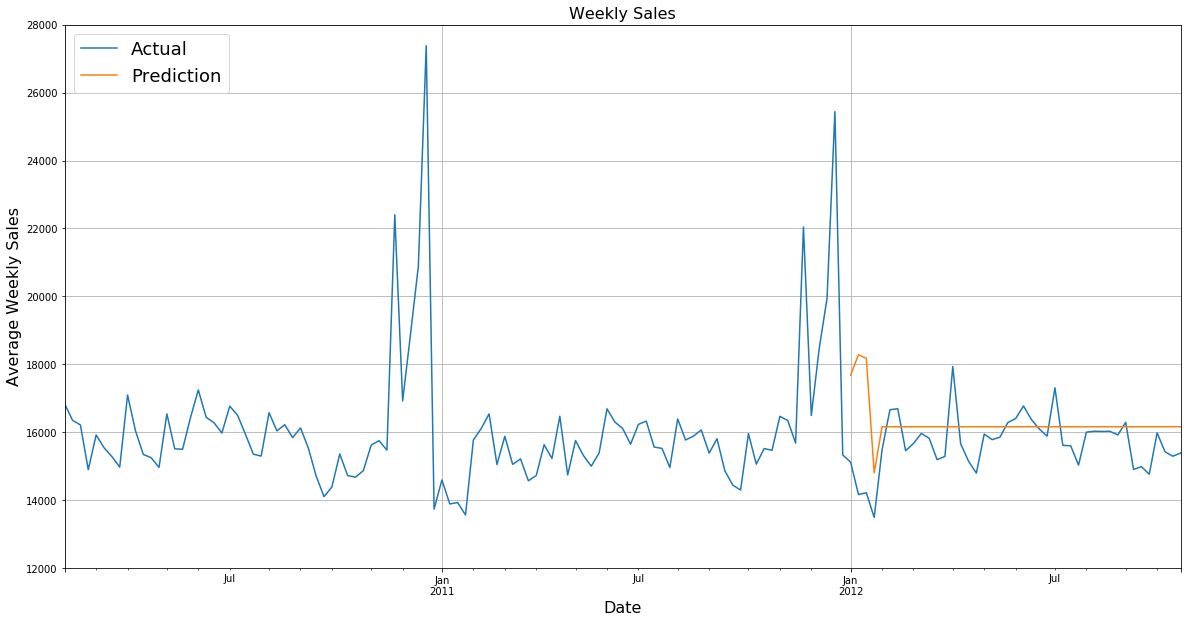

1437158.8831374347

In [13]:
#ARIMA
from statsmodels.tsa.arima_model import ARIMA
#p,d,qtest=trai
#p= periods taken for autoregressive model
#d= integrated order, difference
#q= periods in moving average model 


model_ARIMA=ARIMA(train_data,order=(0,0,4))
model_ARIMA_fit=model_ARIMA.fit(disp=-1)

fig,ax=plt.subplots()
ax=train_final1.Weekly_Sales.plot(ax=ax)
predictions_ARIMA=model_ARIMA_fit.predict(start=100,end=142)
predictions_ARIMA.plot(figsize=(20,10))

plt.legend(['Actual','Prediction'],loc=2,fontsize=18)
plt.grid(True)
plt.title('Weekly Sales',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Average Weekly Sales',fontsize=16)
plt.ylim(12000,28000)

plt.show()
mean_squared_error(test_data.Weekly_Sales,predictions_ARIMA)


In [14]:
#SARIMA
import pmdarima as pm
from pmdarima import model_selection
import numpy as np
from matplotlib import pyplot as plt

model_SARIMA = pm.auto_arima(train_data,
                           m=52,
                           seasonal=True,
                           d=None, D=None, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,staionary=True)


print(model_SARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(2,0,2)x(1,0,1,52) [intercept=True]; AIC=1775.309, BIC=1796.150, Time=7.951 seconds
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=True]; AIC=1812.876, BIC=1818.086, Time=0.064 seconds
Fit ARIMA(1,0,0)x(1,0,0,52) [intercept=True]; AIC=1791.092, BIC=1801.512, Time=2.339 seconds
Fit ARIMA(0,0,1)x(0,0,1,52) [intercept=True]; AIC=1762.054, BIC=1772.475, Time=2.791 seconds
Near non-invertible roots for order (0, 0, 1)(0, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(0,0,0)x(0,0,0,52) [intercept=False]; AIC=2224.689, BIC=2227.294, Time=0.005 seconds
Fit ARIMA(2,0,2)x(0,0,1,52) [intercept=True]; AIC=1761.902, BIC=1780.138, Time=6.648 seconds
Near non-invertible roots for order (2, 0, 2)(0, 0, 1, 52); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.997)
Fit ARIMA(2,0,2)x(1,0,0,52) [intercept=True]; AIC=1774.056, BIC=1792.293, Time=7

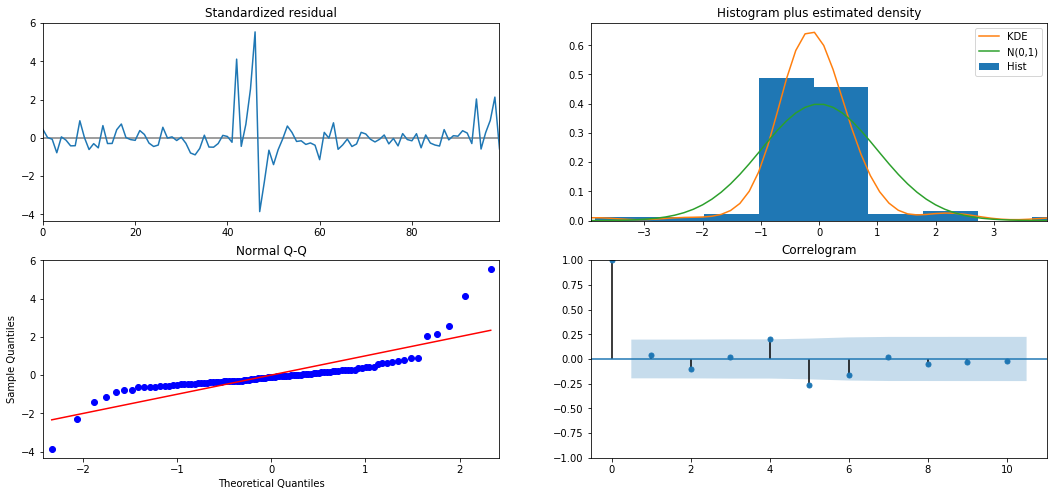

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
model_SARIMA.plot_diagnostics(figsize=(18, 8))
plt.show()

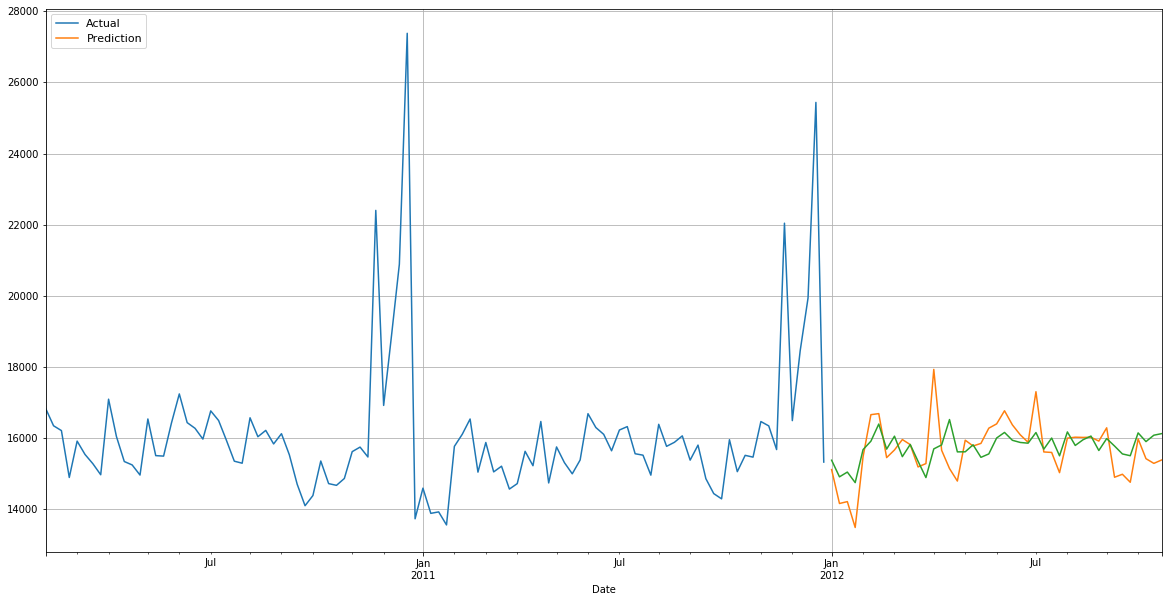

427332.8283414508

In [16]:
#SARIMA

from statsmodels.tsa.statespace.sarimax import SARIMAX
#p,d,qtest=trai
#p= periods taken for autoregressive model
#d= integrated order, difference
#q= periods in moving average model 

model_SARIMA = SARIMAX(train_data, order=(2, 0, 2), seasonal_order=(0, 0,[1],52))
model_SARIMA_fit = model_SARIMA.fit(disp=False)

fig,ax=plt.subplots()
ax=train_data.plot(ax=ax)
test_data.Weekly_Sales.plot(ax=ax)
predictions_SARIMA=model_SARIMA_fit.predict(start=100,end=142)
predictions_SARIMA.plot(figsize=(20,10))

plt.legend(['Actual','Prediction'],loc=2,fontsize=11)
plt.grid(True)

plt.show()
mean_squared_error(test_data.Weekly_Sales,predictions_SARIMA)


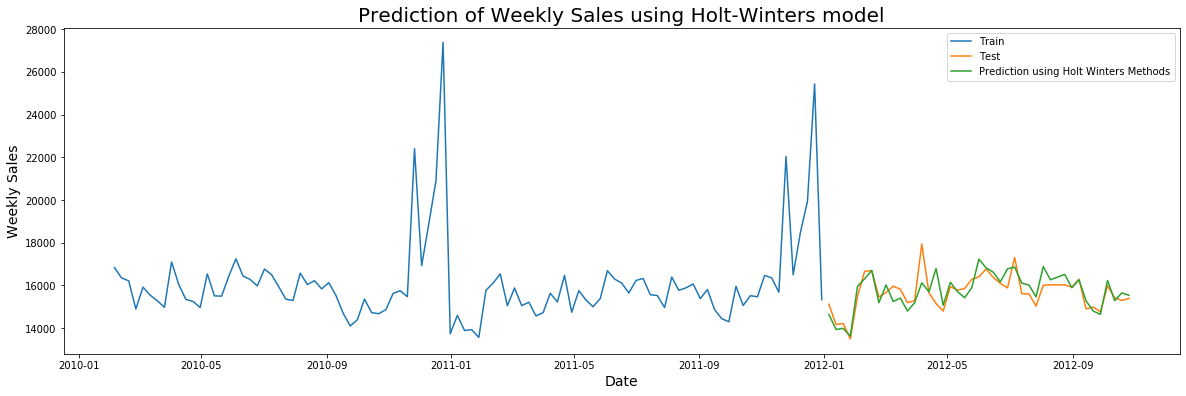

282655.09597588214

In [17]:
#Holt

# Fitting the Holt-Winters method for Weekly Sales.
from statsmodels.tsa.api import ExponentialSmoothing
model_holt_winters = ExponentialSmoothing(train_data, seasonal_periods=52, trend='mul',seasonal='add').fit() 
prediction_Holt = model_holt_winters.predict(start=100,end=142)# Predict the test data
#Visualize train, test and predicted data.


plt.figure(figsize=(20,6))
plt.title('Prediction of Weekly Sales using Holt-Winters model', fontsize=20)
plt.plot(train_data, label='Train')
plt.plot(test_data.Weekly_Sales, label='Test')
plt.plot(prediction_Holt, label='Prediction using Holt Winters Methods')
plt.legend(loc='best')
plt.xlabel('Date', fontsize=14)
plt.ylabel('Weekly Sales', fontsize=14)
plt.show()

mean_squared_error(test_data.Weekly_Sales,prediction_Holt)

In [18]:
#ARIMA
#Holt's Winter Method
#SVR
#Decision Tree
#Random Forest
train_data

Date
2010-02-05    16836.121997
2010-02-12    16352.056032
2010-02-19    16216.658979
2010-02-26    14899.549688
2010-03-05    15921.015727
                  ...     
2011-12-02    16496.511854
2011-12-09    18458.853056
2011-12-16    19942.149333
2011-12-23    25437.146122
2011-12-30    15332.154858
Name: Weekly_Sales, Length: 100, dtype: float64